# Air Quality Analysis (EPA 2025 Data)

## Project Goal
To analyze how air quality varies by state and identify pollutant factors associated with higher AQI levels.

## Data Source
U.S. Environmental Protection Agency (EPA) annual county-level AQI dataset.

## Tools Used
- SQL (SQLite)
- Python (pandas, matplotlib)
- Jupyter Notebook

## Data Loading

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/nledesma/Desktop/annual_aqi_by_county_2025.csv")

In [3]:
df.head()

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,Alabama,Baldwin,2025,241,174,67,0,0,0,0,87,56,42,0,0,91,150,0
1,Alabama,Clay,2025,239,204,34,1,0,0,0,133,52,32,0,0,0,239,0
2,Alabama,DeKalb,2025,243,191,52,0,0,0,0,93,55,42,0,0,156,87,0
3,Alabama,Elmore,2025,177,172,5,0,0,0,0,64,46,32,0,0,177,0,0
4,Alabama,Etowah,2025,241,153,88,0,0,0,0,87,58,45,0,0,72,169,0


## SQL Exploration

In [4]:
conn = sqlite3.connect("aqi_project.db")
df.to_sql("aqi", conn, if_exists="replace", index=False)

978

In [5]:
query = """
SELECT State,
       AVG([Median AQI]) AS avg_median_aqi
FROM aqi
GROUP BY State
ORDER BY avg_median_aqi DESC
LIMIT 10;
"""

top_states = pd.read_sql_query(query, conn)
top_states

,State,avg_median_aqi
0,Country Of Mexico,52.000000
1,District Of Columbia,45.000000
2,California,44.804348
3,Arkansas,44.727273
4,Delaware,44.333333
5,Arizona,43.923077
6,South Carolina,43.769231
7,Oklahoma,43.750000
8,Ohio,43.459459
9,Georgia,42.769231


## Data Cleaning
The dataset was inspected for missing values and filtered to exclude non-U.S. regions to ensure consistent state-level comparisons.

## Visualizations

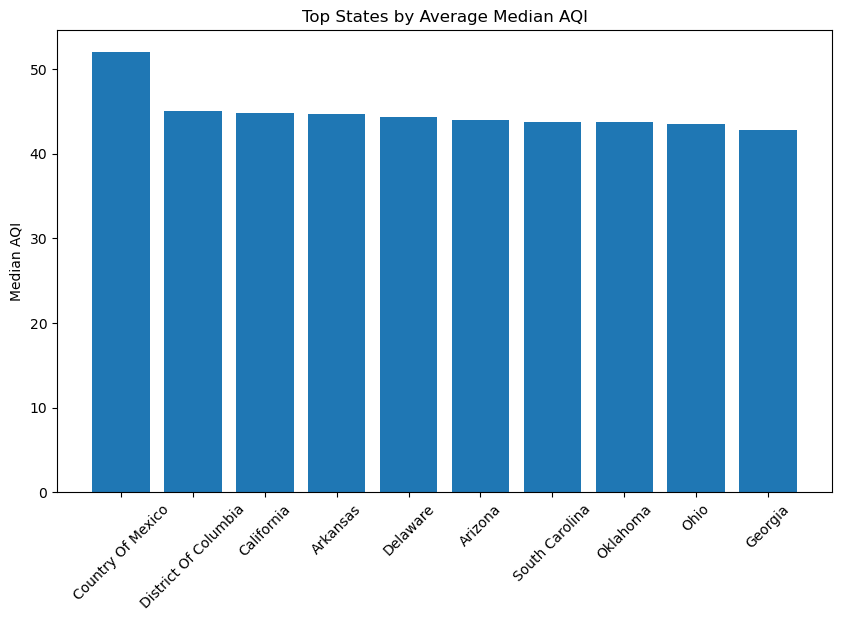

In [6]:
plt.figure(figsize=(10,6))
plt.bar(top_states["State"], top_states["avg_median_aqi"])
plt.xticks(rotation=45)
plt.title("Top States by Average Median AQI")
plt.ylabel("Median AQI")
plt.show()

In [7]:
aqi_average = (
    df.groupby("State")
      .agg({"Median AQI": "mean"})
      .reset_index()
)

In [8]:
aqi_average.head()

,State,Median AQI
0,Alabama,39.533333
1,Alaska,19.750000
2,Arizona,43.923077
3,Arkansas,44.727273
4,California,44.804348


In [9]:
top_states = aqi_average.sort_values(
    "Median AQI",
    ascending=False
).head(10)
top_states

,State,Median AQI
7,Country Of Mexico,52.000000
9,District Of Columbia,45.000000
4,California,44.804348
3,Arkansas,44.727273
8,Delaware,44.333333
2,Arizona,43.923077
42,South Carolina,43.769231
37,Oklahoma,43.750000
36,Ohio,43.459459
11,Georgia,42.769231


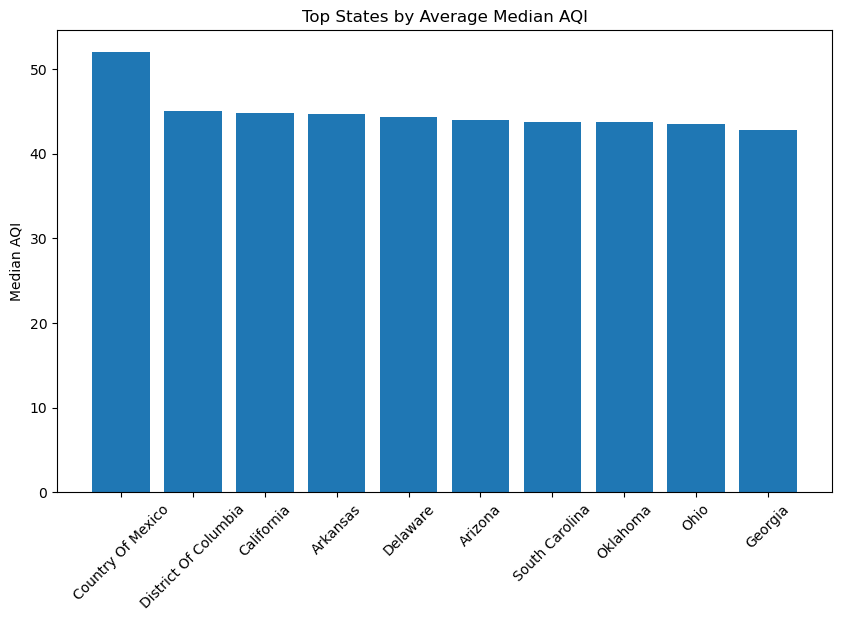

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(top_states["State"], top_states["Median AQI"])
plt.xticks(rotation=45)
plt.title("Top States by Average Median AQI")
plt.ylabel("Median AQI")
plt.show()

In [11]:
df_us = df[df["State"] != "Country Of Mexico"]

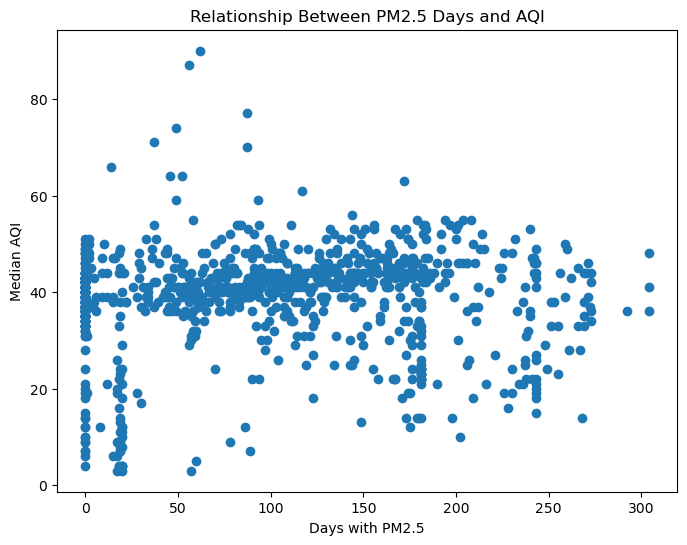

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(df_us["Days PM2.5"], df_us["Median AQI"])
plt.xlabel("Days with PM2.5")
plt.ylabel("Median AQI")
plt.title("Relationship Between PM2.5 Days and AQI")
plt.show()

In [13]:
df_us.select_dtypes(include="number").corr()["Median AQI"].sort_values(ascending=False)

Median AQI                             1.000000
90th Percentile AQI                    0.832363
Moderate Days                          0.734884
Days with AQI                          0.473908
Unhealthy for Sensitive Groups Days    0.451489
Days Ozone                             0.404717
Max AQI                                0.341719
Unhealthy Days                         0.302547
Very Unhealthy Days                    0.197077
Hazardous Days                         0.168986
Days PM2.5                             0.067741
Good Days                             -0.028990
Days CO                               -0.105801
Days NO2                              -0.135740
Days PM10                             -0.188504
Year                                        NaN
Name: Median AQI, dtype: float64

## Key Insights

- Significant variation exists in average median AQI across states, indicating geographic and environmental influences on air quality.

- Counties with higher PM2.5 days show a positive association with elevated AQI levels, suggesting particulate pollution as a key contributor.

- Initial analysis identified non-U.S. regions within the dataset, requiring filtering to ensure consistent state-level comparison.

- The correlation analysis further supports the relationship between PM2.5 exposure and AQI levels.

## Conclusion
This analysis demonstrates regional variation in air quality and highlights the potential relationship between particulate pollution and AQI levels. Future analysis could include geographic mapping or time-series trends.

## Limitations

- The dataset reflects annual summary values and does not capture seasonal or daily variation.
- AQI aggregation may mask short-term extreme pollution events.